**Need of Employee Attrition prediction**

1. **Managing workforce**: If the supervisors or HR came to know about some employees that they will be planning to leave the company then they could get in touch with those employees which can help them to stay back or they can manage the workforce by hiring the new alternative of those employees.


2. **Smooth pipeline**: If all the employees in the current project are working continuously on a project then the pipeline of that project will be smooth but if suppose one efficient asset of the project(employee) suddenly leave that company then the workflow will be not so smooth.


3. **Hiring Management**: If HR of one particular project came to know about the employee who is willing to leave the company then he/she can manage the number of hiring and they can get the valuable asset whenever they need so for the efficient flow of work.

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

Connecting to the data present in google drive folder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Reading the dataset
data = pd.read_csv("/content/drive/MyDrive/MAS/Projects/Employee Attrition/data.csv")

In [4]:
data.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


## Data exploration

Dropping the index column

In [5]:
data.reset_index(drop = True,inplace=True)
data.set_index('table id', inplace = True)
data.head()

,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
table id,,,,,,,,,,,,,,,
1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


Checking for null values

In [6]:
print(data.isnull().sum())
print("Table Structure (Row, Column):",data.shape)

name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       4
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           2
Stay/Left                0
dtype: int64
Table Structure (Row, Column): (902, 15)


As we can see that there are null values in the Experience and Job role so we have to drop them.

In [7]:
data.dropna(axis=0,inplace=True)

Now, checking the new structure of the table

In [8]:
print(data.isnull().sum())
print("Table Structure (Row, Column):",data.shape)

name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       0
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           0
Stay/Left                0
dtype: int64
Table Structure (Row, Column): (896, 15)


# Data Visualisation

**Let’s explore all the categorical values and visualize them**

Now, we will use the **value_counts** function so that we can get the **unique values** from every **categorical type of data.**

## **Gender**

Male      656
Female    234
other       6
Name: Gender , dtype: int64


(array([0, 1, 2]),
 [Text(0, 0, 'Male'), Text(1, 0, 'Female'), Text(2, 0, 'other')])

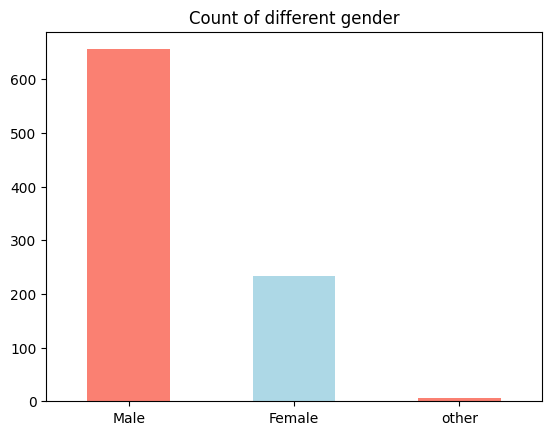

In [9]:
print(data["Gender "].value_counts())
data['Gender '].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of different gender")
plt.xticks(rotation=0)

Here, from the chart, it’s visible that the count of males is more than another category of the gender.

**Now, let’s figure out that how gender could be the reason for employees to leave the company or to stay in.**

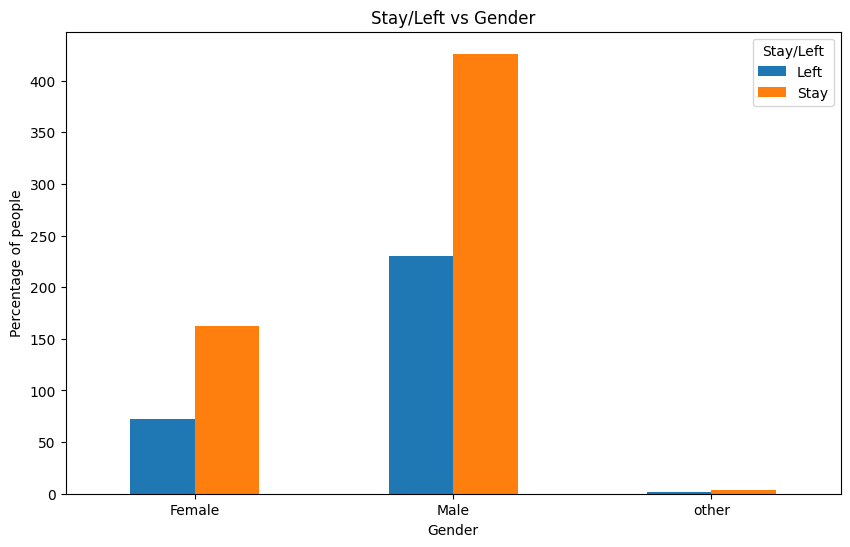

In [12]:
#Create a plot for crosstab

df1 = pd.crosstab(data['Gender '],data['Stay/Left'])
df1.plot(kind="bar",figsize=(10,6))

plt.title("Stay/Left vs Gender")
plt.xlabel("Gender")
plt.ylabel("Percentage of people")
plt.xticks(rotation=0)
plt.show()

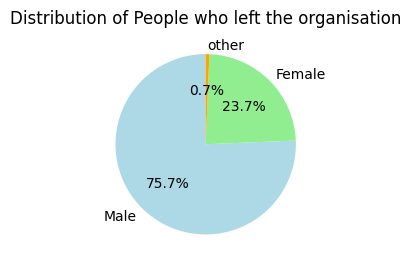

In [13]:
df2 = data[data['Stay/Left']=="Left"]['Gender '].value_counts()

plt.subplot(1,2,2)
plt.pie(df2.values,labels= df2.index,colors=['lightblue','lightgreen','orange'],autopct="%1.1f%%",startangle=90)
plt.title("Distribution of People who left the organisation")
plt.show()

Here, from the charts it’s visible that it heavily depends on males, as the number of males are most and most percentage of males are leaving the organisation.

## **Promotion (Promoted/ Non-Promoted)**

In [14]:
print(data["Promoted/Non Promoted"].value_counts())

Promoted        457
Non Promoted    439
Name: Promoted/Non Promoted, dtype: int64


(array([0, 1]), [Text(0, 0, 'Promoted'), Text(1, 0, 'Non Promoted')])

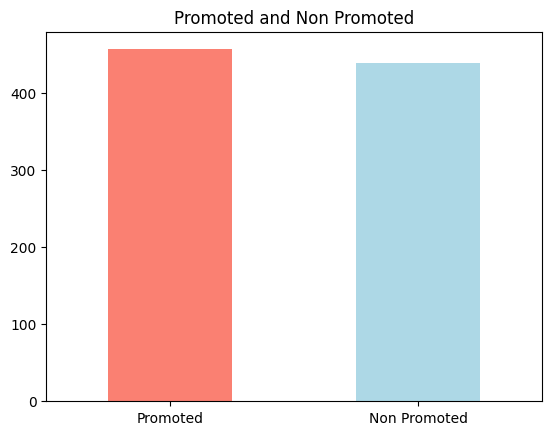

In [15]:
data['Promoted/Non Promoted'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Promoted and Non Promoted")
plt.xticks(rotation=0)

Now, from the above chart, we can see that when it comes to Promoted and Non-Promoted employees it’s quiet in balanced number.

**Now, let’s figure out that how promotion could be the reason for employees to leave the company or to stay in.**

(array([0, 1]), [Text(0, 0, 'Non Promoted'), Text(1, 0, 'Promoted')])

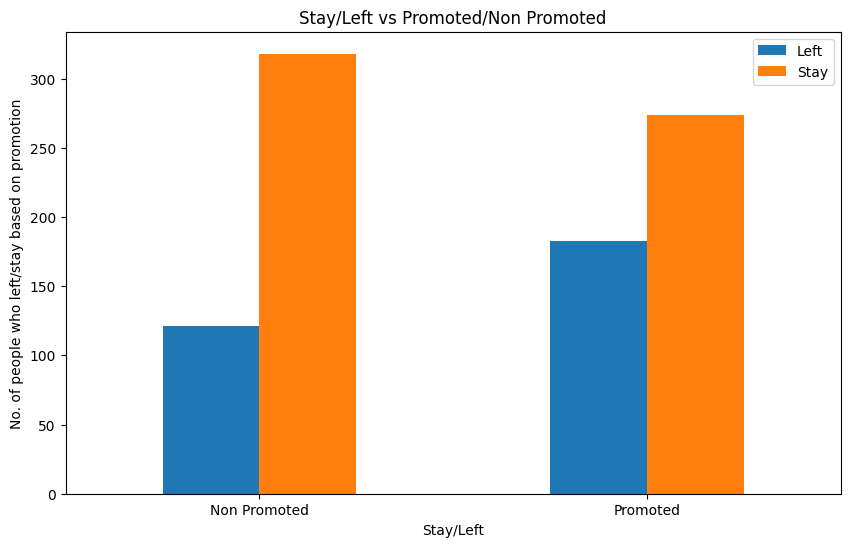

In [16]:
#Create a plot for crosstab

pd.crosstab(data['Promoted/Non Promoted'],data['Stay/Left']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Promoted/Non Promoted")
plt.xlabel("Stay/Left")
plt.ylabel("No. of people who left/stay based on promotion")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

Here, from the chart, it’s visible that the ones who are not promoted are leaving the company more as compared to the ones who are promoted which is also an obvious thing likely to happen.

**Function (Operation/ Support/ Sales)**

In [18]:
func_dict = data["Function"].value_counts()
func_dict

Operation    832
Support       52
Sales         12
Name: Function, dtype: int64

<Axes: title={'center': 'Functions in organization'}>

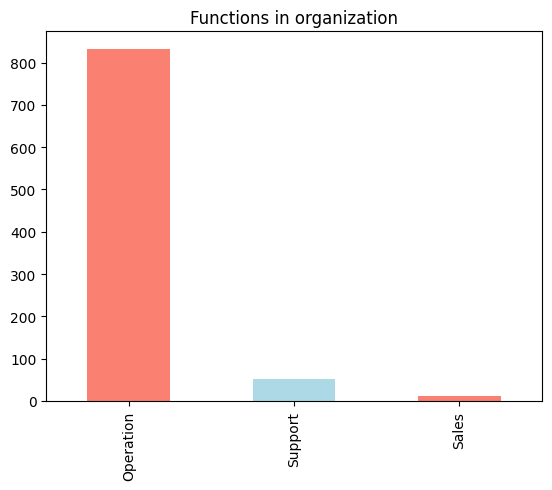

In [19]:
data['Function'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Functions in organization")

Now, we can see that majority of the function performed by employees are Operation itself then support and at the last it’s sales.

**Now, let’s figure out that how function could be the reason for employees to leave the company or to stay in.**

(array([0, 1, 2]),
 [Text(0, 0, 'Operation'), Text(1, 0, 'Sales'), Text(2, 0, 'Support')])

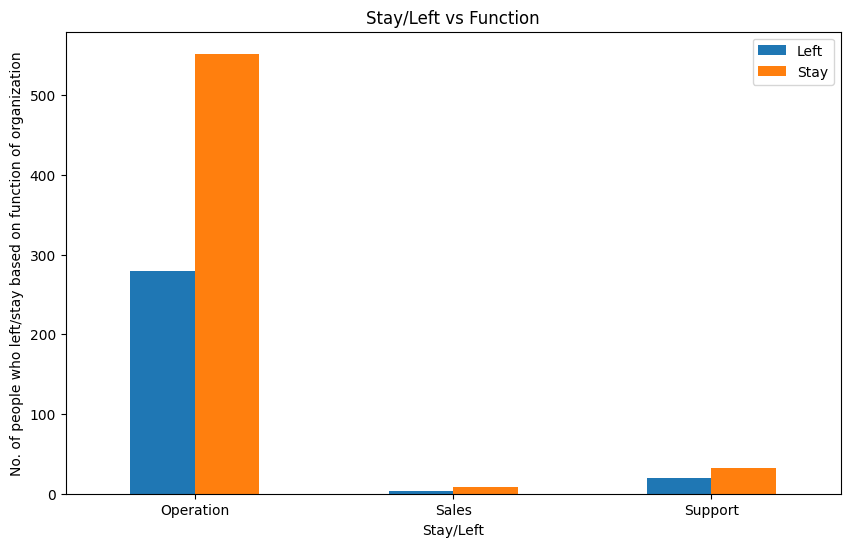

In [20]:
#Create a plot for crosstab

pd.crosstab(data['Function'],data['Stay/Left']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Function")
plt.xlabel("Stay/Left")
plt.ylabel("No. of people who left/stay based on function of organization")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

Here, in the chart, we can see that the maximum number of employees are in the operation section and a high number of employees in the same section are staying in the company.

**Hiring (Direct/ Agency/ Employee referral)**

In [21]:
Hiring_dict = data["Hiring Source"].value_counts()
Hiring_dict

Direct               709
Agency               116
Employee Referral     71
Name: Hiring Source, dtype: int64

**Marital Status (Single/ Married/ Seperated/ Div./ NTBD)**

In [22]:
Marital_dict = data["Marital Status"].value_counts()
print(Marital_dict)

Single    534
Marr.     356
Div.        2
NTBD        2
Sep.        2
Name: Marital Status, dtype: int64


**Employee group**

In [23]:
Emp_dict = data["Emp. Group"].value_counts()
Emp_dict['other group'] = 1
print(Emp_dict)

B1             537
B2             276
B3              59
B0               8
B4               7
B5               4
B7               2
B6               1
C3               1
D2               1
other group      1
Name: Emp. Group, dtype: int64


**Job role match (Yes/ No)**

In [24]:
job_dict = data["Job Role Match"].value_counts()
job_dict

Yes    481
No     415
Name: Job Role Match, dtype: int64

Now, we can see that majority of the employees have their correct role in Job.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

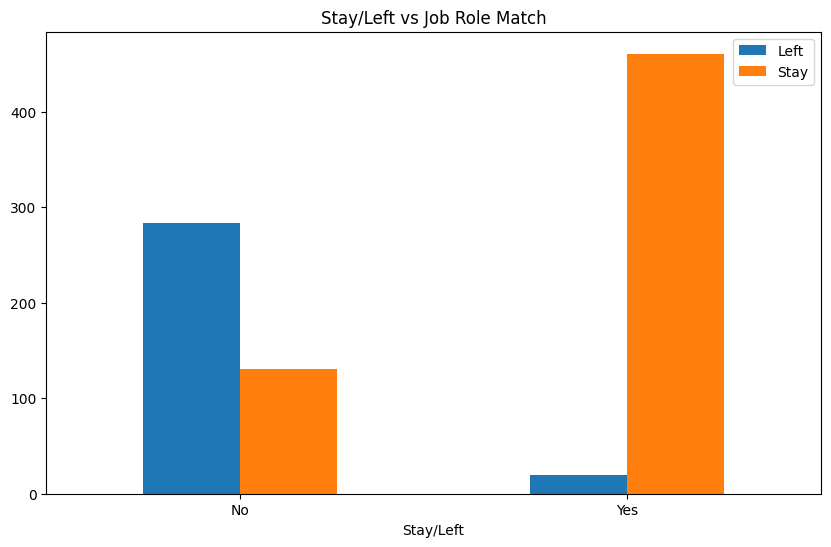

In [25]:
#Create a plot for crosstab

pd.crosstab(data['Job Role Match'],data['Stay/Left']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Job Role Match")
plt.xlabel("Stay/Left")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

Here, in the above chart, we can see that the number of employees who got the correct job role is staying in the company rather than the ones who don’t have their right job role.

**Tenure group**

In [26]:
tenure_dict = data["Tenure Grp."].value_counts()
print(tenure_dict)

> 1 & < =3    626
< =1          270
Name: Tenure Grp., dtype: int64


**Now let’s visualize some continuous data**

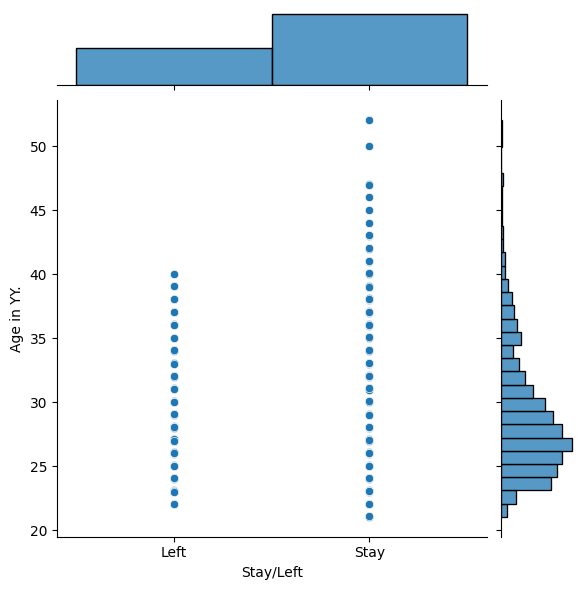

In [27]:
# Its Age vs stay/left
sns.jointplot(x='Stay/Left',y='Age in YY.',data=data)

In the above graph, we can see that the ones who are having more age are staying back in the company rather than the ones who have comparatively less age.

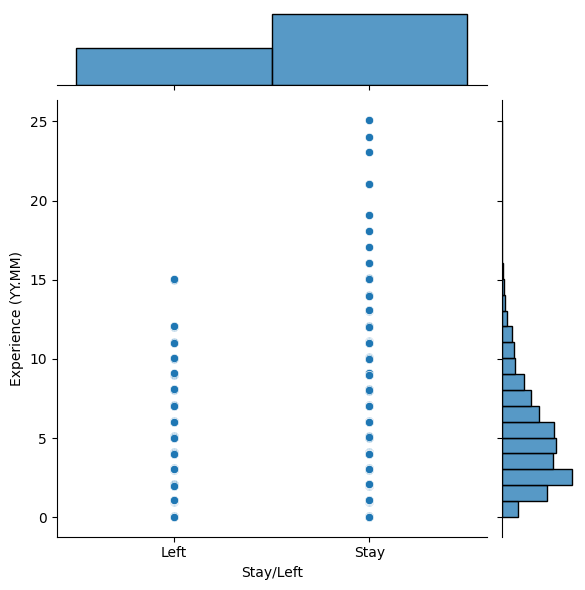

In [28]:
sns.jointplot(x='Stay/Left',y='Experience (YY.MM)',data=data)

Here in the above graph, we can see that the employees who have got more experience will be staying back in the company rather than the ones who have comparatively less experience.

Here, first, we are trying to get the correlation between variables where the dataset is not processed that’s why we are not able to see the results in the manner we want to, **but in the latter half of the project, we will see the better correlation plot with the help of processed data.**

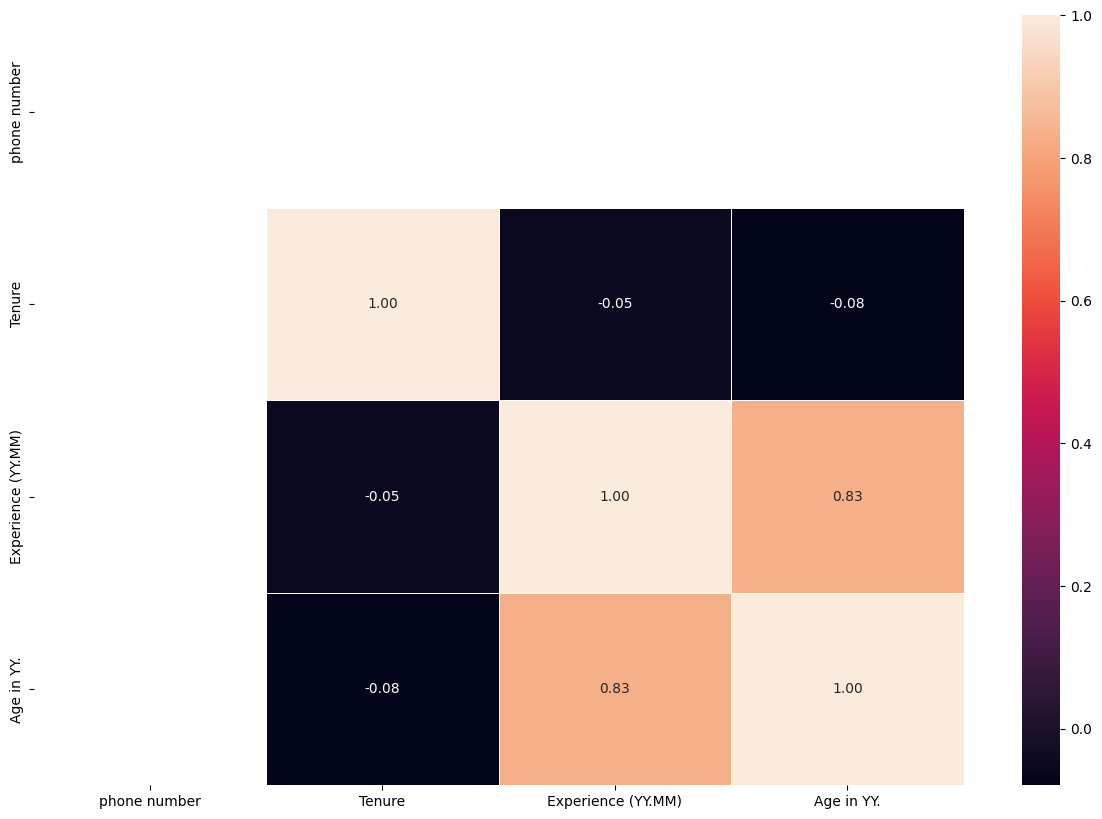

In [29]:
# Let's make our correlation matrix visual
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

## Data cleaning

**Encoding the locations column (categorized)**

Build a new dictionary (**location**) to be used to categorize data columns after **values are encoded.** Here, in **location_dict_new** we are using integer values instead of the actual region name so that our **machine learning** model could **interpret** it.

In [30]:
location_dict = data["Location"].value_counts()
print(location_dict)

Chennai       255
Noida         236
Bangalore     210
Hyderabad      62
Pune           56
Madurai        29
Lucknow        20
Nagpur         14
Vijayawada      6
Mumbai          4
Gurgaon         3
Kolkata         1
Name: Location, dtype: int64


In [31]:
location_dict_new = {
    'Chennai':       7,
    'Noida':         6,
    'Bangalore':     5,
    'Hyderabad':     4,
    'Pune':          3,
    'Madurai':       2,
    'Lucknow':       1,
    'other place':   0,
}

print(location_dict_new)

{'Chennai': 7, 'Noida': 6, 'Bangalore': 5, 'Hyderabad': 4, 'Pune': 3, 'Madurai': 2, 'Lucknow': 1, 'other place': 0}


Now we will make a function for the **location column** to make a new column where encoded location values will be there because our machine learning algorithm will only understand **int/float values.**

In [32]:
def location(x):
    if str(x) in location_dict_new.keys():
        return location_dict_new[str(x)]
    else:
        return location_dict_new['other place']

data_l = data["Location"].apply(location)
data['New Location'] = data_l
data.head()

,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location
table id,,,,,,,,,,,,,,,,
1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,3
2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6
3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5
4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6
5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1


**get_dummies()**

Pandas **get_dummies()** function is used for **manipulating data**, this function is used to convert the **categorical values to dummy variables** and the same thing has been done with:

1. Function
2. Hiring Source
3. New Marital
4. New Gender
5. Tenure group

In [33]:
gen = pd.get_dummies(data["Function"])
gen.head()

,Operation,Sales,Support
table id,,,
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
5,1,0,0


In [34]:
hr = pd.get_dummies(data["Hiring Source"])
hr.head()

,Agency,Direct,Employee Referral
table id,,,
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0


**Marital Status**

Here, in Mar() function we are using **Maritial dictionary keys** to convert those categorical values into acceptable type values for our ML models.

In [35]:
def Mar(x):
    if str(x) in Marital_dict.keys() and Marital_dict[str(x)] > 100:
        return str(x)
    else:
        return 'other status'

data_l = data["Marital Status"].apply(Mar)
data['New Marital'] = data_l
data.head()

,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital
table id,,,,,,,,,,,,,,,,,
1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,3,Single
2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6,Marr.
3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.
4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6,Marr.
5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.


Using the get_dummies to function for New Marital we are converting categorical values into dummy variables

In [36]:
Mr = pd.get_dummies(data["New Marital"])
Mr.head()

,Marr.,Single,other status
table id,,,
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


**Promoted/Not Promoted**

Here, with the help of **Promoted function**, we are converting **Promoted and Non promoted** values into **1 and 0 respectively** for **encoding purposes.**

In [37]:
def Promoted(x):
    if x == 'Promoted':
        return int(1)
    else:
        return int(0)

data_l = data["Promoted/Non Promoted"].apply(Promoted)
data['New Promotion'] = data_l
data.head()

,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion
table id,,,,,,,,,,,,,,,,,,
1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,3,Single,0
2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6,Marr.,1
3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1
4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6,Marr.,1
5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0


**Employee Group**

Here first, we are creating a **dictionary** for the **employee group** and tagging each group to the respective integer values, later we are creating **an emp()** function where the **encoding of the categorical values is done** – similar to **marital status**.

In [38]:
Emp_dict_new = {
    'B1': 4,
    'B2': 3,
    'B3': 2,
    'other group': 1,
}
def emp(x):
    if str(x) in Emp_dict_new.keys():
        return str(x)
    else:
        return 'other group'

data_l = data["Emp. Group"].apply(emp)
data['New EMP'] = data_l

emp = pd.get_dummies(data["New EMP"])
data.head()

,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion,New EMP
table id,,,,,,,,,,,,,,,,,,,
1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,3,Single,0,B2
2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6,Marr.,1,other group
3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1,B3
4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6,Marr.,1,B2
5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0,B2


**Job Role Match**

Here, we are using the **Job()** function where categorical values are **Yes and No** which needs to be converted into integer values **i.e. 1/0** then we are assigning the **New Job Role Match**.

In [39]:
def Job(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)

data_l = data["Job Role Match"].apply(Job)
data['New Job Role Match'] = data_l
data.head()

,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion,New EMP,New Job Role Match
table id,,,,,,,,,,,,,,,,,,,,
1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,3,Single,0,B2,1
2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6,Marr.,1,other group,0
3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1,B3,1
4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6,Marr.,1,B2,1
5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0,B2,1


**Gender**

Here, we are using the **Gen()** function using **gender_dict (dictionary)** which will be encoded first using the **dictionary keys**, and then the changes will be applied to the dataset based on changes that are done.

In [44]:
data["Gender "].value_counts()

Male      656
Female    234
other       6
Name: Gender , dtype: int64

In [45]:
gender_dict = {
    "M": "Male",
    "F": "Female",
    "O":"Other"
}
def Gen(x):
    if x in gender_dict.keys():
        return str(x)
    else:
        return 'other'

data_l = data["Gender "].apply(Gen)
data['New Gender'] = data_l
data.head()

,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,...,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion,New EMP,New Job Role Match,New Gender
table id,,,,,,,,,,,,,,,,,,,,,
1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,...,Direct,Non Promoted,Yes,Left,3,Single,0,B2,1,other
2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,...,Direct,Promoted,No,Stay,6,Marr.,1,other group,0,other
3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,...,Direct,Promoted,Yes,Stay,5,Marr.,1,B3,1,other
4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,...,Direct,Promoted,Yes,Stay,6,Marr.,1,B2,1,other
5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,...,Direct,Non Promoted,Yes,Stay,1,Marr.,0,B2,1,other


**get_dummies()** function for the same purposes for **New gender** and **Tenure groups**.

In [46]:
gend = pd.get_dummies(data["New Gender"])
gend.head()

,other
table id,
1,1
2,1
3,1
4,1
5,1


In [47]:
tengrp = pd.get_dummies(data["Tenure Grp."])
tengrp.head()

,< =1,> 1 & < =3
table id,,
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0


Now, let’s concatenate the columns which are being cleaned, sorted, and manipulated by us as processed data.

In [49]:
dataset = pd.concat([data, hr, Mr, emp, tengrp, gen, gend], axis = 1)
dataset.head()

,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,...,B1,B2,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,other
table id,,,,,,,,,,,,,,,,,,,,,
1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,...,0,1,0,0,1,0,1,0,0,1
2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,...,0,0,0,1,1,0,0,0,1,1
3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,...,0,0,1,0,1,0,1,0,0,1
4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,...,0,1,0,0,1,0,1,0,0,1
5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,...,0,1,0,0,1,0,1,0,0,1


In [50]:
dataset.columns

Index(['name', 'phone number', 'Location', 'Emp. Group', 'Function', 'Gender ',
       'Tenure', 'Tenure Grp.', 'Experience (YY.MM)', 'Marital Status',
       'Age in YY.', 'Hiring Source', 'Promoted/Non Promoted',
       'Job Role Match', 'Stay/Left', 'New Location', 'New Marital',
       'New Promotion', 'New EMP', 'New Job Role Match', 'New Gender',
       'Agency', 'Direct', 'Employee Referral', 'Marr.', 'Single',
       'other status', 'B1', 'B2', 'B3', 'other group', '< =1', '> 1 & < =3',
       'Operation', 'Sales', 'Support', 'other'],
      dtype='object')

Let’s drop the columns which are not important anymore

In [52]:
dataset.drop([ "name", "Marital Status","Promoted/Non Promoted","Function","Emp. Group","Job Role Match","Location"
              ,"Hiring Source","Gender ", 'Tenure', 'New Gender', 'New Marital', 'New EMP'],axis=1,inplace=True)

dataset1 = dataset.drop(['Tenure Grp.', 'phone number'], axis = 1)
dataset1.columns

Index(['Experience (YY.MM)', 'Age in YY.', 'Stay/Left', 'New Location',
       'New Promotion', 'New Job Role Match', 'Agency', 'Direct',
       'Employee Referral', 'Marr.', 'Single', 'other status', 'B1', 'B2',
       'B3', 'other group', '< =1', '> 1 & < =3', 'Operation', 'Sales',
       'Support', 'other'],
      dtype='object')

As I mentioned, this is the correlation plot on the processed dataset.

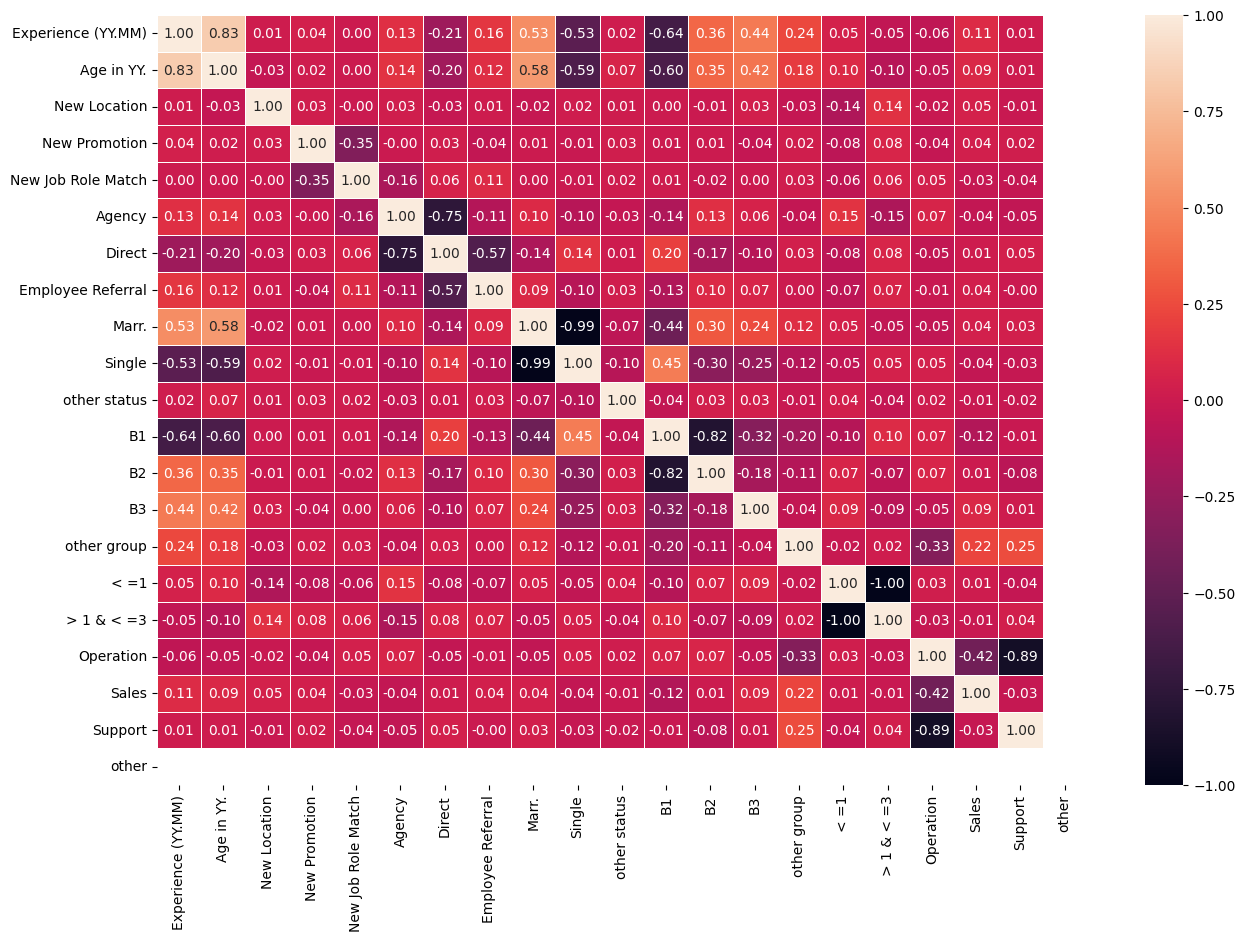

In [53]:
# Let's make our correlation matrix visual
corr_matrix=dataset1.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

Let’s see our target column

In [54]:
# Target
"""
def Target(x):
    if x in "Stay":
        return False
    else:
        return True

data_l = dataset1["Stay/Left"].apply(Target)
dataset1['Stay/Left'] = data_l
"""
dataset1['Stay/Left'].head()

table id
1    Left
2    Stay
3    Stay
4    Stay
5    Stay
Name: Stay/Left, dtype: object

Saving the cleaned dataset into another CSV file

In [55]:
dataset1.to_csv("processed table.csv")

Now, from the processed data we have to separate the features and target column again.

In [56]:
dataset = pd.read_csv("processed table.csv")
dataset = pd.DataFrame(dataset)
y = dataset["Stay/Left"]
X = dataset.drop("Stay/Left",axis=1)

In [57]:
##Splitting data – Train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_train.head()

,table id,Experience (YY.MM),Age in YY.,New Location,New Promotion,New Job Role Match,Agency,Direct,Employee Referral,Marr.,...,B1,B2,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,other
385,389,7.05,30.02,6,0,1,0,1,0,0,...,0,1,0,0,0,1,1,0,0,1
215,219,3.07,24.03,6,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,1
399,403,5.00,29.02,3,0,1,0,1,0,1,...,1,0,0,0,0,1,1,0,0,1
411,415,3.08,30.10,6,1,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,1
354,358,8.04,29.06,5,1,1,0,1,0,0,...,0,1,0,0,0,1,1,0,0,1


## Model Development

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

**Initializing the models**

1. **Logistic Regression** : C: Inverse of regularization strength (float), **random state**: (int), **solver**: sag,saga,liblinear (Here, we are using liblinear).


2. **Decision trees**: Default parameters


3. **Random forest**: Default parameters


4. **Gaussian Naive Bayes**: Default parameters


5. **K-nearest neighbors**: n_neighbors=3 – we can have another number of neighbors too.


6. **Support vector machines**: kernel can be **linear, polynomial, RBF, sigmoid.** Here we are using a **linear kernel function.**

In [59]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

Now, from one block of code, we will check the accuracy of all the model

In [60]:
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.896648
[Logistic Regression] test data accuracy is : 0.855556
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.872222
[KNN] training data accuracy is : 0.794693
[KNN] test data accuracy is : 0.555556
[SVM] training data accuracy is : 0.882682
[SVM] test data accuracy is : 0.838889
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.866667
[Naive Bayes] training data accuracy is : 0.863128
[Naive Bayes] test data accuracy is : 0.833333


**Model Scores (accuracy)**

In [61]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test)
             }
model_scores


{'Logistic Regression': 0.8555555555555555,
 'KNN classifier': 0.5555555555555556,
 'Support Vector Machine': 0.8388888888888889,
 'Random forest': 0.8666666666666667,
 'Decision tree': 0.8722222222222222,
 'Naive Bayes': 0.8333333333333334}

Here, we can see that **Logistic regression** and **Random forest** have the best accuracy.

**Classification Report of Random forest**

In [62]:
from sklearn.metrics import classification_report

rm_y_preds = rm.predict(X_test)

print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

        Left       0.82      0.79      0.80        62
        Stay       0.89      0.91      0.90       118

    accuracy                           0.87       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.87      0.87      0.87       180



**Classification Report of Logistic Regression**

In [63]:
from sklearn.metrics import classification_report

lr_y_preds = lr.predict(X_test)

print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

        Left       0.82      0.74      0.78        62
        Stay       0.87      0.92      0.89       118

    accuracy                           0.86       180
   macro avg       0.85      0.83      0.84       180
weighted avg       0.85      0.86      0.85       180



**Model Comparison**

Based on the **accuracy**

In [64]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,0.855556,0.555556,0.838889,0.866667,0.872222,0.833333


**Visualize the accuracy of each model**

<Axes: >

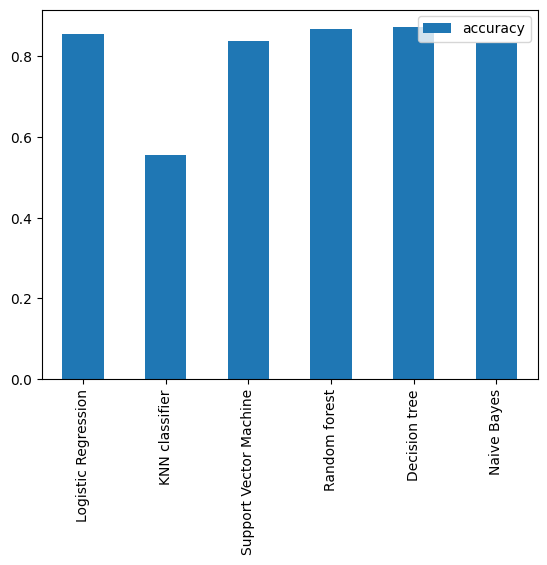

In [65]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

Yes, we can see that **Random Forest** has 1% better accuracy than **Logistic regression** but Random Forest is an overfitted model hence we will select **Logistic regression.**

**Feature importance**

These “coef’s” tell how much and in what way did each one of them contribute to predicting the target variable

In [66]:
# Logistic regression
feature_dict=dict(zip(dataset.columns,list(lr.coef_[0])))
feature_dict

{'table id': -0.00038990713671761525,
 'Experience (YY.MM)': 0.08689613305070028,
 'Age in YY.': -0.0041709973886348735,
 'Stay/Left': 0.005958779854588484,
 'New Location': 0.18992111120720498,
 'New Promotion': 2.74513198531305,
 'New Job Role Match': -0.22649591760790758,
 'Agency': -0.08932942312181097,
 'Direct': 0.17956922178709167,
 'Employee Referral': 0.479748903839454,
 'Marr.': -0.5929219223015512,
 'Single': -0.02308310048052209,
 'other status': -0.20500642849452025,
 'B1': 0.09488221000380183,
 'B2': -0.13142440225723706,
 'B3': 0.10529250180533513,
 'other group': -0.1262108449377429,
 '< =1': -0.01004527400488236,
 '> 1 & < =3': -0.04863203007368448,
 'Operation': 0.009027491107546878,
 'Sales': -0.09665157997648545,
 'Support': -0.13625611894263212}

This is a type of Model-driven Exploratory data analysis.

**Visualize feature importance**

<Axes: title={'center': 'Feature Importance'}>

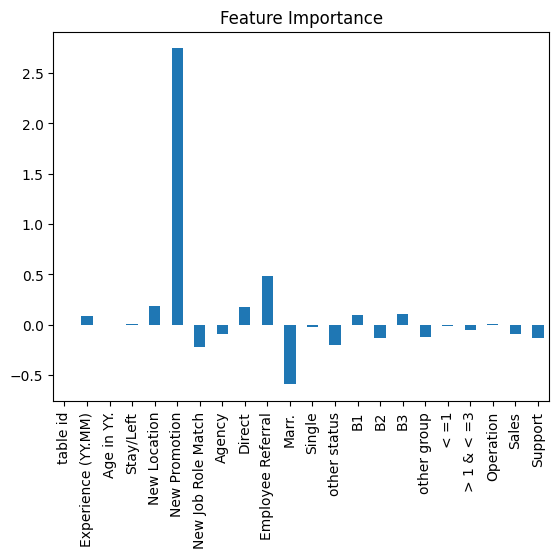

In [67]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

As we can see that **“New promotion” column has the highest feature importance.**

**Saving the best model**

**Approach -1**

Logistic Regression model because it has the best accuracy as well it is neither overfitted nor under fitted

In [68]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(lr)

# Load the pickled model
lr_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
lr_from_pickle.predict(X_test)

array(['Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Left',
       'Stay', 'Left', 'Left', 'Stay', 'Left', 'Left', 'Stay', 'Left',
       'Left', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Left',
       'Left', 'Stay', 'Stay', 'Left', 'Left', 'Stay', 'Stay', 'Stay',
       'Stay', 'Left', 'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Stay',
       'Left', 'Stay', 'Stay', 'Left', 'Stay', 'Left', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Left', 'Stay',
       'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Left', 'Left', 'Stay',
       'Stay', 'Stay', 'Stay', 'Left', 'Left', 'Stay', 'Left', 'Left',
       'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Stay', 'Stay', 'Left',
       'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Left', 'Stay', 'Stay',
       'Left', 'Left', 'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Stay',
       'Stay', 'Left', 'Left', 'Stay', 'Stay', 'Stay', 'Left', 'Left',
      

**Approach – 2**

In [69]:
# loading dependency
import joblib

# saving our model - model - model , filename - model_lr
joblib.dump(lr , 'model_lr')

# opening the file- model_jlib
m_jlib = joblib.load('model_lr')

# check prediction
m_jlib.predict(X_test) # similar output

array(['Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Left',
       'Stay', 'Left', 'Left', 'Stay', 'Left', 'Left', 'Stay', 'Left',
       'Left', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Left',
       'Left', 'Stay', 'Stay', 'Left', 'Left', 'Stay', 'Stay', 'Stay',
       'Stay', 'Left', 'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Stay',
       'Left', 'Stay', 'Stay', 'Left', 'Stay', 'Left', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Left', 'Stay',
       'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Stay', 'Stay', 'Stay',
       'Stay', 'Stay', 'Stay', 'Stay', 'Stay', 'Left', 'Left', 'Stay',
       'Stay', 'Stay', 'Stay', 'Left', 'Left', 'Stay', 'Left', 'Left',
       'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Stay', 'Stay', 'Left',
       'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Left', 'Stay', 'Stay',
       'Left', 'Left', 'Stay', 'Stay', 'Left', 'Stay', 'Stay', 'Stay',
       'Stay', 'Left', 'Left', 'Stay', 'Stay', 'Stay', 'Left', 'Left',
      